In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

In [2]:
res_df = pd.read_pickle('./results/MERFISH_benchmark/pairwise_stats_results.pkl')

In [3]:
my_palette = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:3]+sns.color_palette('Paired')[4:5]+sns.color_palette('Paired')[6:8]+sns.color_palette('Paired')[11:12]
methods = ['Spateo', 'PASTE', 'PASTE2', 'Moscot', 'SLAT','STAlign','STAlign_GT', 'SPACEL', ]

C:\Users\lyf04\AppData\Local\Temp\ipykernel_24924\949179021.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','STAlign', 'STAlign-GT', 'SPACEL'])


Spateo - STAlign_GT: p-value:8.278109113199597e-05
Spateo - SPACEL: p-value:0.003743523365227336


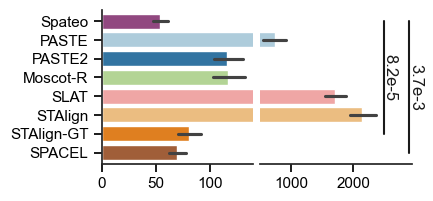

In [5]:
import matplotlib as mpl
import os
from scipy.stats import ttest_ind
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})

fig, axs = plt.subplots(1,2,figsize=(4,2), gridspec_kw={'wspace':0.05})
sns.set_theme(style="ticks")
g = sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_df,
    ax=axs[0],
    palette=my_palette,
    hue_order=methods,
    order=methods,
)
g = sns.barplot(
    x="mae", 
    y="Method",
    hue="Method",
    data=res_df,
    ax=axs[1],
    palette=my_palette,
    hue_order=methods,
    order=methods,
)
axs[0].set_ylim([7.6, -0.6])
axs[0].set_xlim([0, 140])

axs[1].set_yticks([])
axs[1].set_ylabel('')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_xlabel('')

axs[0].set_yticklabels(['Spateo','PASTE','PASTE2','Moscot-R','SLAT','STAlign', 'STAlign-GT', 'SPACEL'])

y = 2500
h = 0.02
x1 = 0
x2 = 6
group1 = res_df[res_df['Method'] == methods[x1]]['mae']
group2 = res_df[res_df['Method'] == methods[x2]]['mae']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
axs[1].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[1].text(1.04*y, (x1 + x2) * .5, '8.2e-5', ha='center', va='center', c='k', rotation=-90)
axs[1].set_xlim([500, 2600])
axs[1].set_ylim([7.5, -0.5])

y = 2900
h = 0.02
x1 = 0
x2 = 7
group1 = res_df[res_df['Method'] == methods[x1]]['mae']
group2 = res_df[res_df['Method'] == methods[x2]]['mae']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
axs[1].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[1].text(1.04*y, (x1 + x2) * .5, '3.7e-3', ha='center', va='center', c='k', rotation=-90)
axs[1].set_xlim([500, 2950])
axs[1].set_ylim([7.6, -0.6])


sns.despine(ax=axs[0])
sns.despine(ax=axs[1], left=True)
plt.savefig('./figures/pairwise_benchmark/MERFISH.pdf', dpi=300, bbox_inches='tight', transparent=True)